In [70]:
%matplotlib inline

import geopandas as gpd

from weavingspace import WeaveUnit
from weavingspace import TileUnit
from weavingspace import Tiling

In [107]:
data = gpd.read_file("other-data/double-name-2.gpkg")

<AxesSubplot:>

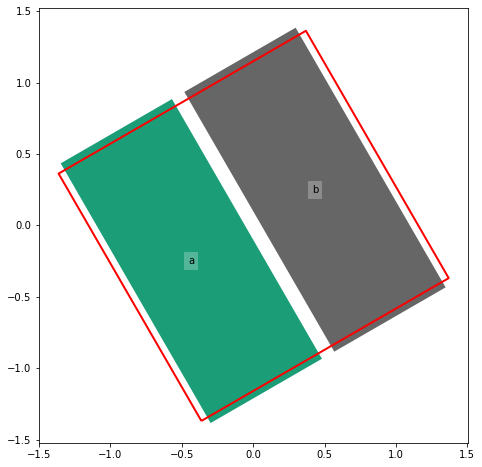

In [134]:
unit = WeaveUnit(strands = "ab|-", 
                       spacing = 1, aspect = 0.9, crs = data.crs).transform_rotate(30)
unit.plot(r = 0)

In [135]:
tiling = Tiling(unit, data)

In [136]:
t = tiling.get_tiled_map(debug = True)

STEP 1: prep data (rotation if requested): 0.011
STEP A2: overlay zones with tiling: 2.767
STEP A3: calculate areas: 0.014
STEP A4: drop columns prior to join: 0.003


/home/osullid3/Documents/code/weaving-space/weavingspace/tile_map.py:331: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  overlaps["area"] = overlaps.geometry.area


STEP A5: build lookup for join: 0.690
STEP A6: perform lookup join: 0.015
STEP A7/B3: dissolve tiles within zones: 0.001


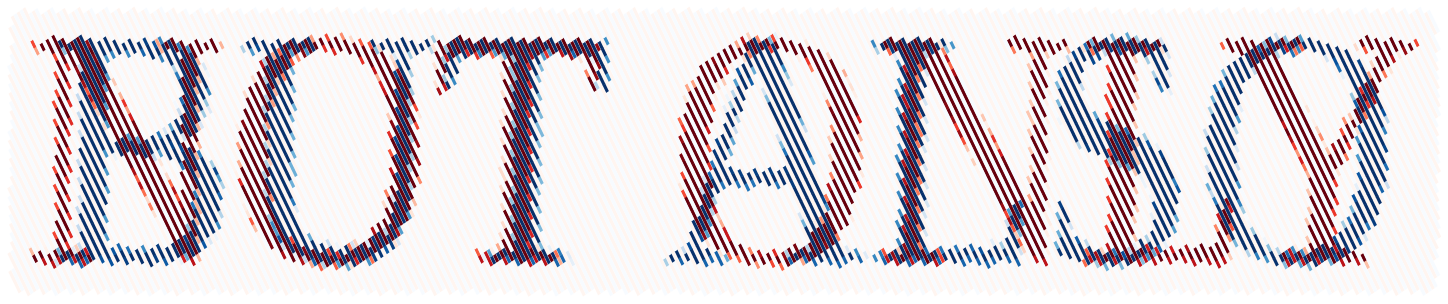

In [137]:
t.variables = dict(zip(list("ab"), ["notonly", "butalso"]))
t.colourmaps = dict(zip(t.variables.values(), 
                          ["Reds", "Blues"]), scheme = "equalinterval")

fig = t.render(legend = False, linewidth = 0)

In [138]:
t.to_file("other-data/dual-name-tiled-4.gpkg")

## An alternative perspective
The elements of any given tiling can be rearranged with respect to the base tile, and if the `regularised_tile` is then remade from the repositioned elements, different effects can be achieved by insetting to emphasize different repeating units in the pattern.

In this case, we move the lower two elements _c_ and _d_ up half a tile, and the upper two _a_ and _b_ down half a tile we can form a cross-like grouping of the tiles instead of the hexagonal arrangement. The retiled map is quite different in appearance, although it contains the same data.

<AxesSubplot:>

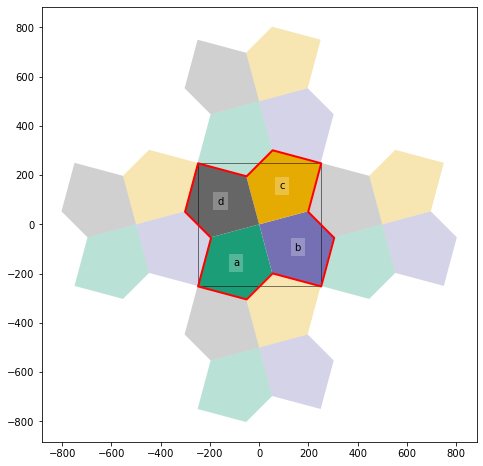

In [7]:
from shapely.affinity import translate

v = tile_unit.get_vectors()
v = [v[2], v[2], v[0], v[0]]  # these are the up and down vectors
tile_unit.elements.geometry = gpd.GeoSeries(
    [translate(g, xy[0] / 2, xy[1] / 2) 
     for g, xy in zip(tile_unit.elements.geometry, v)])
tile_unit.setup_regularised_tile_from_elements()
tile_unit.plot(r = 1)

This time we also prioritise by TILE not ELEMENT using the `tiles_or_elements` flag.

STEP 1: prep data (rotation if requested): 0.323
STEP A2: overlay zones with tiling: 0.323
STEP A3: calculate areas: 0.001
STEP A4: drop columns prior to join: 0.001
STEP A5: build lookup for join: 0.027
STEP A6: perform lookup join: 0.007
STEP A7/B3: dissolve tiles within zones: 0.001


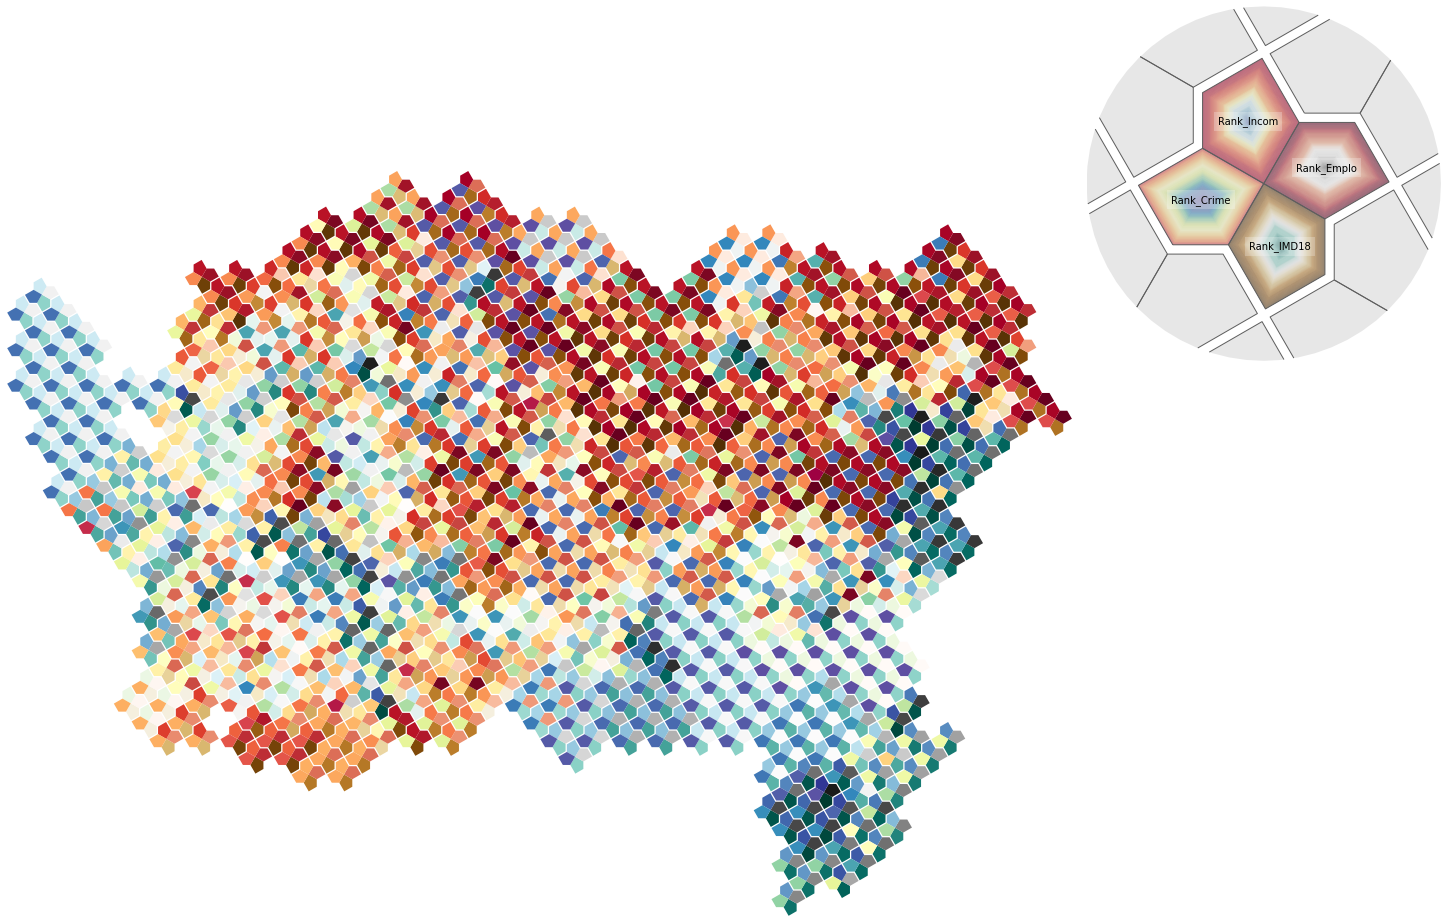

In [8]:
tiling = Tiling(tile_unit, ak, tile_margin = 12.5)
t = tiling.get_tiled_map(rotation = 45, debug = True, 
                         tiles_or_elements = "tiles")

t.variables = dict(zip(list("abcd"), 
                         [x for x in ak if "Rank" in x]))
t.colourmaps = dict(zip(t.variables.values(), 
                          ("BrBG", "RdGy", "RdYlBu", "Spectral", 
                           "PiYG", "PRGn", "PuOr", "viridis")))

fig = t.render(use_ellipse = True, legend_dy = -0.05)